# **Speaker Recognition**
#### *Author: Jiadai Yu, Shu Wang, Yulu Jiang*

## **I. Project Summary**


### 1.1 Objective

Our project involves a speaker recognition task that utilizes lecture recordings from the courses we had in the past two semesters as the raw data source. The model is designed to pre-process input speech, extract audio features of professors, and perform classification tasks. Our goal is to develop a model that can learn the unique voice features of each professor and accurately recognize the speaking individual by extracting features from the test audio.

Our project primarily focuses on speaker recognition, which involves extraction, characterization, and recognition of the audio to identify the speaker. It is important to note that our project does not aim to perform speech recognition, which involves recognizing the words spoken in the speech and converting them into text information.

### 1.2 Motivation

As we have not previously explored video and audio data types in our prior projects, we are excited to embark on this challenge and expand our knowledge of machine learning. Our aim is to utilize novel Python packages in our investigation.

To ensure data accessibility, we have selected Echo360 lecture recordings of Questrom professors as our data source. We will engage in sufficient communication with the recording owner to address any ethical concerns that may arise.

Our project is designed to enrich our learning experience by examining audio clips of speakers, specifically Questrom professors. We are curious to observe how machine learning algorithms classify the speaker of an audio clip, and whether they produce varying results compared to our own predictions. Furthermore, we aim to identify any shared voice features amongst the professors that may have gone unnoticed.

### 1.3 Application

This project has significant academic implications for Questrom students, serving as a valuable tool to enhance their learning experience. Through speaker recognition technology, Echo360 can differentiate between speakers in recorded lectures, facilitating navigation for students.

Moreover, access to a larger dataset beyond Questrom professors could provide valuable insights into security authentication. By verifying the speaker's identity, the system can offer reliable authentication and grant access only to authorized individuals for sensitive information.

Human voice characteristics, like fingerprints, are unique biometrics for each individual. An accurate speaker classification model can confirm a speaker's identity and assist in criminal investigations. This approach, using on-site audio-visual data, can help identify suspects more efficiently than traditional methods such as fingerprint, hair, or blood tests.

## **II. Data Collection**

### 2.1 Background
The lack of open source data is a significant challenge in voice recognition field due to accessibility issues, insufficient labeling, inadequate speaker sample size, or noisy data. This limitation often hinders the development of more complex models and applications in related research.

Our project presents a unique opportunity to contribute to this field by collecting data from video recordings of courses within our program. Due to technological constraints, we use screen recording to obtain the raw video, which is then preprocessed using Python. Video data is converted into audio and segmented into structured audio clips with manual labeling.

### 2.2 Collection Process
One of the initial challenges we encountered before constructing the model was the collection of data. Our initial approach involved utilizing an Echo360 video downloader from GitHub to download recordings. However, due to the university's restrictive licensing, this approach was not feasible. Instead, we opted to use our devices for screen recording, with a specific duration of video for each professor.

During this process, we recognized the need to consider the choice of video among the various classes and start time to minimize noise and outliers in the data collection stage. We deliberately avoided recording guest speaker sessions and focused on the professor's primary speaking segments, as opposed to student discussions.

### 2.2 Collected Data
We did screen recording for 20 minutes each for the 9 speakers, which is our labels. In the end, we collected 1222 samples in total after segmenting the long video into 10 seconds each audio piece.

## **III. Data Processing**

### 3.1 Loading packages
We first install required processing packages.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/Shareddrives/BA865/Audio/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shareddrives/BA865/Audio


In [ ]:
!pip install soundfile
import soundfile
from scipy import signal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 3.2 Segmenting audio dataset

**DO NOT RUN THIS!!**

In [ ]:
from pydub import AudioSegment
import os
input_folder = '/content/drive/Shareddrives/BA865/Audio/'

# create a directory to store the segmented files in your Google Drive
output_folder = '/content/drive/Shareddrives/BA865/Segmented_Audio/'
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

# set the duration of each segment in milliseconds
segment_duration = 10000

# iterate over each input file in the input folder
for filename in os.listdir(input_folder):
    # check if the file is a .wav file
    if filename.endswith('.wav'):
        # set the input file path
        input_path = os.path.join(input_folder, filename)
        
        # load the audio file
        audio = AudioSegment.from_file(input_path, format='wav')
        
        # get the total duration of the audio file in milliseconds
        total_duration = len(audio)
        
        # iterate over each segment of the audio file and export it as a separate file
        for i in range(0, total_duration, segment_duration):
            # set the output file path
            output_filename = f'{filename.split(".")[0]}_segment_{i//segment_duration}.wav'
            output_path = os.path.join(output_folder, output_filename)
            
            # segment the audio file and export the segment as a separate file
            segment = audio[i:i+segment_duration]
            segment.export(output_path, format='wav')

### 3.3 Display a segmented audio example 

/content/drive/Shareddrives/BA865/Segmented_Audio/MohammadSoltaniehHa-775-780_segment_95.wav


<ipython-input-6-9a397852a2b9>:21: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y,sr=sr, x_axis='time', color='purple',offset=0.0)


Total Duration: 10.0 seconds.


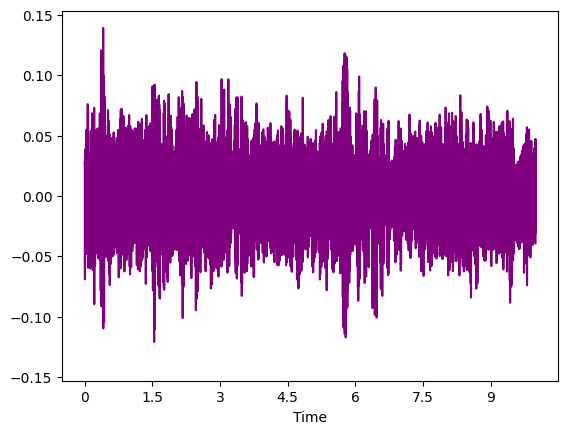

In [ ]:
from IPython.display import Audio
from IPython.display import display
import glob
import librosa.display
import librosa
   
basePath = '/content/drive/Shareddrives/BA865/Segmented_Audio/'

for i,file in enumerate(glob.glob(f"{basePath}/*.wav")):
  
  # What's the name of the file? 
  sound_file = f'{file}'
  print(sound_file)

  # Play the audio file.
  wn = Audio(sound_file, autoplay=True) ##
  display(wn)

  # Draw the waveform plot of the audio signal.
  y,sr=librosa.load(sound_file, sr=400) 
  librosa.display.waveshow(y,sr=sr, x_axis='time', color='purple',offset=0.0)

  # Write out how long the file is in seconds.
  print(f'Total Duration: {librosa.get_duration(y=y,sr=sr)} seconds.')
  
  break

In [ ]:
from scipy.io import wavfile

sampling_rate, data = wavfile.read(sound_file) 
print(f'Song is originally sampled at {sampling_rate} times per second.')
print(f'The first file contains a total of {len(data)} samples, thus the song length is {len(data)/sampling_rate} seconds.')
print(f'Here are the first 15 samples of that first recording...{data[:15]}.')

Song is originally sampled at 48000 times per second.
The first file contains a total of 480000 samples, thus the song length is 10.0 seconds.
Here are the first 15 samples of that first recording...[[ 351  381]
 [1269 1242]
 [1958 1922]
 [1878 1870]
 [1471 1470]
 [1373 1363]
 [1651 1660]
 [1902 1945]
 [1613 1648]
 [ 643  629]
 [-117 -156]
 [ 282  263]
 [1526 1532]
 [2571 2580]
 [2517 2526]].


### 3.4 Downsampling

Our initial audio data is 48000Hz, which means that a 10-second file contains 480000 numbers.Typically, RNN would suffer from long sequences and it takes much more time for both RNN and CNN to process this long sequence.So I will perform downsampling on the dataset to 8000Hz first.

In [ ]:
import numpy as np
from pathlib import Path
from scipy.signal import decimate
import scipy.signal as signal


def processSong(song):
  
  filename = Path(song).stem
  label = filename[0:3]

  sampling_rate, data = wavfile.read(song)
  return label,sampling_rate,data

labels = []
sample_rates = []
sequences = []
#Set the new rate to 8000
new_rate = 8000
for i,file in enumerate(glob.glob(f"{basePath}/*.wav")):
  label, sample_rate, sequence = processSong(file)
  labels.append(label)
  number_of_samples = round(len(sequence)*float(new_rate)/sampling_rate)
  sequence = signal.resample(sequence,number_of_samples)
  sample_rates.append(new_rate)

  
  
  sequences.append(sequence)

sequences[0]

array([[ 2341.9907192 ,  2342.82026515],
       [  938.95095044,   938.68310909],
       [ 1596.69678516,  1599.59634561],
       ...,
       [ 3136.97491453,  3101.19186791],
       [ -880.79798958,  -937.12257343],
       [-2114.23248073, -2129.11336544]])

In [ ]:
def print_frequency_table(arrays):
    freq = {}
    for array in arrays:
        length = len(array)
        if length in freq:
            freq[length] += 1
        else:
            freq[length] = 1
    for length, count in freq.items():
        print(f"Length {length}: {count} arrays")
print_frequency_table(sequences)

Length 80000: 1213 arrays
Length 29520: 1 arrays
Length 4952: 1 arrays
Length 37624: 1 arrays
Length 64496: 1 arrays
Length 1752: 1 arrays
Length 68544: 1 arrays
Length 8008: 1 arrays
Length 41416: 1 arrays
Length 34136: 1 arrays


After we downsample the audio,most of the files are now of length 80000.This is still a high number,so we will truncate them and shuffle the dataset.

### 3.5 Padding

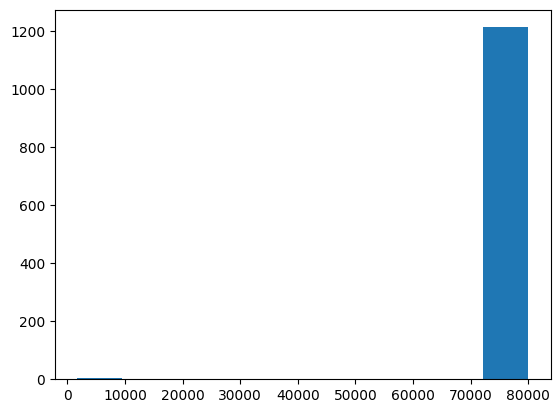

The longest list is 80000 long.
(1222, 80000, 2)


In [ ]:
import tensorflow as tf
import numpy as np
import statistics
import matplotlib.pyplot as plt
from keras.utils import pad_sequences
from sklearn.preprocessing import MinMaxScaler

len_lists = [len(x) for x in sequences]
plt.hist(len_lists)
plt.show()
print(f'The longest list is {max(len_lists)} long.')

# We can pad the sequences to have a common length (and chop off the end of really long ones)
labels = np.stack(labels)

# Be careful with this pad sequences function! By default it pads at the front...
# If you pad the wrong end and then truncate that can have a huge impact on model accuracy (e.g., 10%)
padded_sequences = pad_sequences(sequences, maxlen=80000,padding="post")  

# We might use a min-max scaler here to whiten our data. Note that audio data is already generally centered around 0 though! So, it's not that important. 
#scaler = MinMaxScaler(feature_range=(-1, 1))
#scaler = scaler.fit(padded_sequences)
#padded_sequences = scaler.transform(padded_sequences)

# Shuffling observations, because certain voices come earlier in the file system, and others later.
shuffled_indices= np.arange(padded_sequences.shape[0])
np.random.shuffle(shuffled_indices)
padded_sequences = padded_sequences[shuffled_indices,:]
labels = labels[shuffled_indices]

print(padded_sequences.shape)

### 3.6 Create labels for each audio file

In [ ]:
#Print text labels
distinct_values = list(set(labels))
print(distinct_values)

['Moh', 'Pau', 'And', 'Tes', 'Gor', 'Joh', 'Nac', 'Dok', 'Mar']


In [ ]:
# Transform text labels to numerical labels
my_dict = {'Nac': 0, 'Moh': 1,'Mar': 2, 'And': 3,'Pau': 4, 'Gor': 5,'Dok': 6, 'Tes': 7,'Joh':8}
new_label = [my_dict.get(item, item) for item in labels]
new_label = np.array(new_label)

## **IV. 1D Convolutional Neural Network**

### 4.1 Create 1D CNN Model

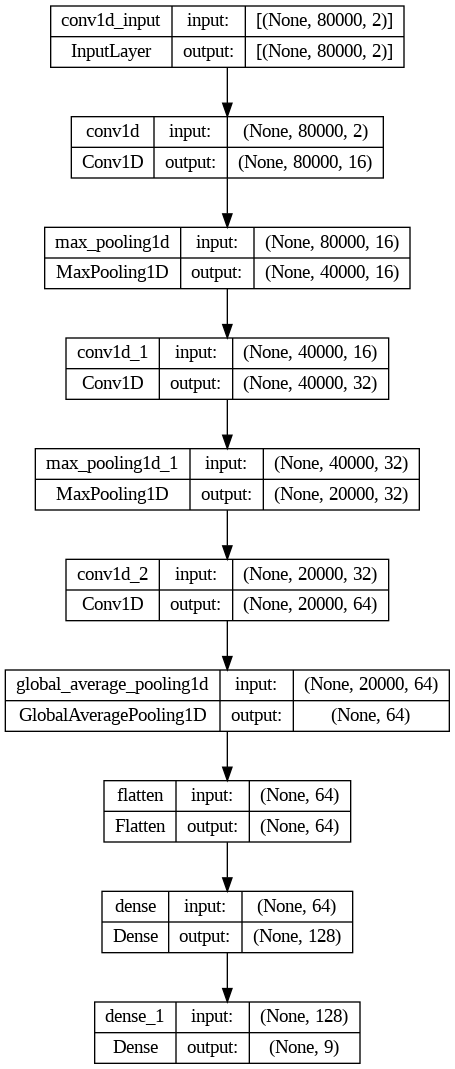

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(16, 1, activation='relu', input_shape=(80000,2)))
model.add(tf.keras.layers.MaxPooling1D(2))
model.add(tf.keras.layers.Conv1D(32, 1, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(2))
model.add(tf.keras.layers.Conv1D(64, 1, activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(9, activation='softmax'))
  
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])
keras.utils.plot_model(model,show_shapes=True)

### 4.2 Fitting Model

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="audio_conv.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(padded_sequences,new_label,validation_split=0.2,batch_size=64,epochs=250,callbacks=callbacks)

Epoch 1/250
16/16 [==============================] - 18s 300ms/step - loss: 90.9097 - sparse_categorical_accuracy: 0.1238 - val_loss: 46.7055 - val_sparse_categorical_accuracy: 0.1633
Epoch 2/250
16/16 [==============================] - 3s 165ms/step - loss: 36.9627 - sparse_categorical_accuracy: 0.1771 - val_loss: 23.5265 - val_sparse_categorical_accuracy: 0.1143
Epoch 3/250
16/16 [==============================] - 3s 186ms/step - loss: 12.8544 - sparse_categorical_accuracy: 0.1546 - val_loss: 10.2880 - val_sparse_categorical_accuracy: 0.1388
Epoch 4/250
16/16 [==============================] - 3s 164ms/step - loss: 6.9097 - sparse_categorical_accuracy: 0.2037 - val_loss: 4.6101 - val_sparse_categorical_accuracy: 0.2612
Epoch 5/250
16/16 [==============================] - 3s 179ms/step - loss: 3.8693 - sparse_categorical_accuracy: 0.2180 - val_loss: 3.0743 - val_sparse_categorical_accuracy: 0.2531
Epoch 6/250
16/16 [==============================] - 3s 170ms/step - loss: 3.0506 - spar

### 4.3 Model Performance

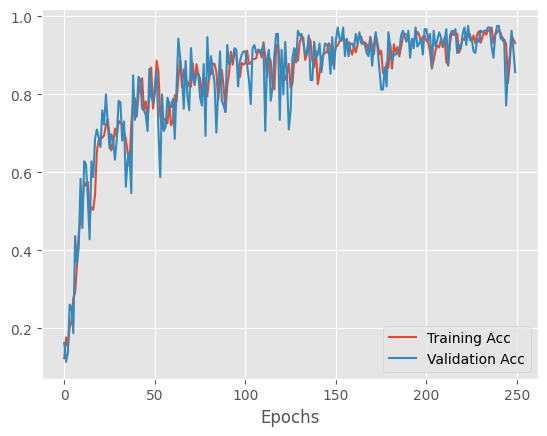

In [ ]:
plt.style.use('ggplot')

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel("Epochs")
plt.legend(['Training Acc','Validation Acc'])
plt.show()

Overall,the performance of this 1-D convolutional neural network is satisfying.It has training accuracy and validation accuracy of approximately 0.93.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_true = new_label
y_pred = model.predict(padded_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_true, y_pred_classes))

39/39 [==============================] - 1s 36ms/step
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       127
           1       0.93      0.90      0.91       134
           2       1.00      0.99      1.00       118
           3       0.95      0.99      0.97       128
           4       1.00      0.12      0.22       129
           5       0.51      1.00      0.68       140
           6       1.00      0.75      0.86       129
           7       1.00      0.96      0.98       159
           8       0.97      1.00      0.98       158

    accuracy                           0.86      1222
   macro avg       0.92      0.86      0.84      1222
weighted avg       0.92      0.86      0.84      1222



## **V. 2D Convolutional Neural Network**

### 5.1 Waveform and frequency spectrum plot of a sample audio file

This is another interesting way of dealing with audio data.A sound can be converted to a spectogram, which is a chart that shows the amount of each frequency at each time in an audio file. It has been shown that this approach can beat state-of-the-art environmental sound detection models.

We will try this method and create a 2D convolutional neural network.

In [ ]:
import os
INPUT_DIR = '/content/drive/Shareddrives/BA865/Segmented_Audio/'

parent_list = os.listdir(INPUT_DIR)
for i in range(2):
    print(parent_list[i])

MohammadSoltaniehHa-775-780_segment_95.wav
MohammadSoltaniehHa-775-780_segment_96.wav


Below is the sample wave form graph and frequency spectrum graph from two professors' audio segments respectively.

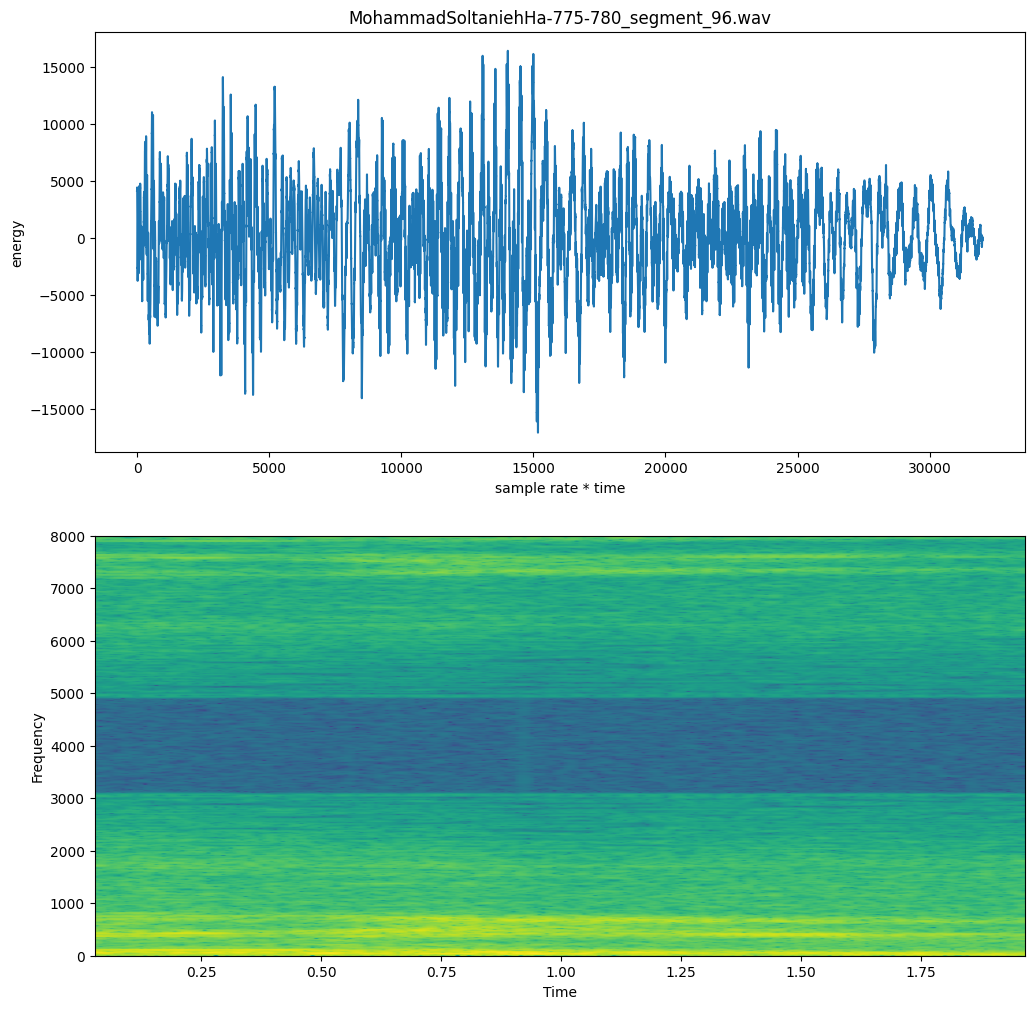

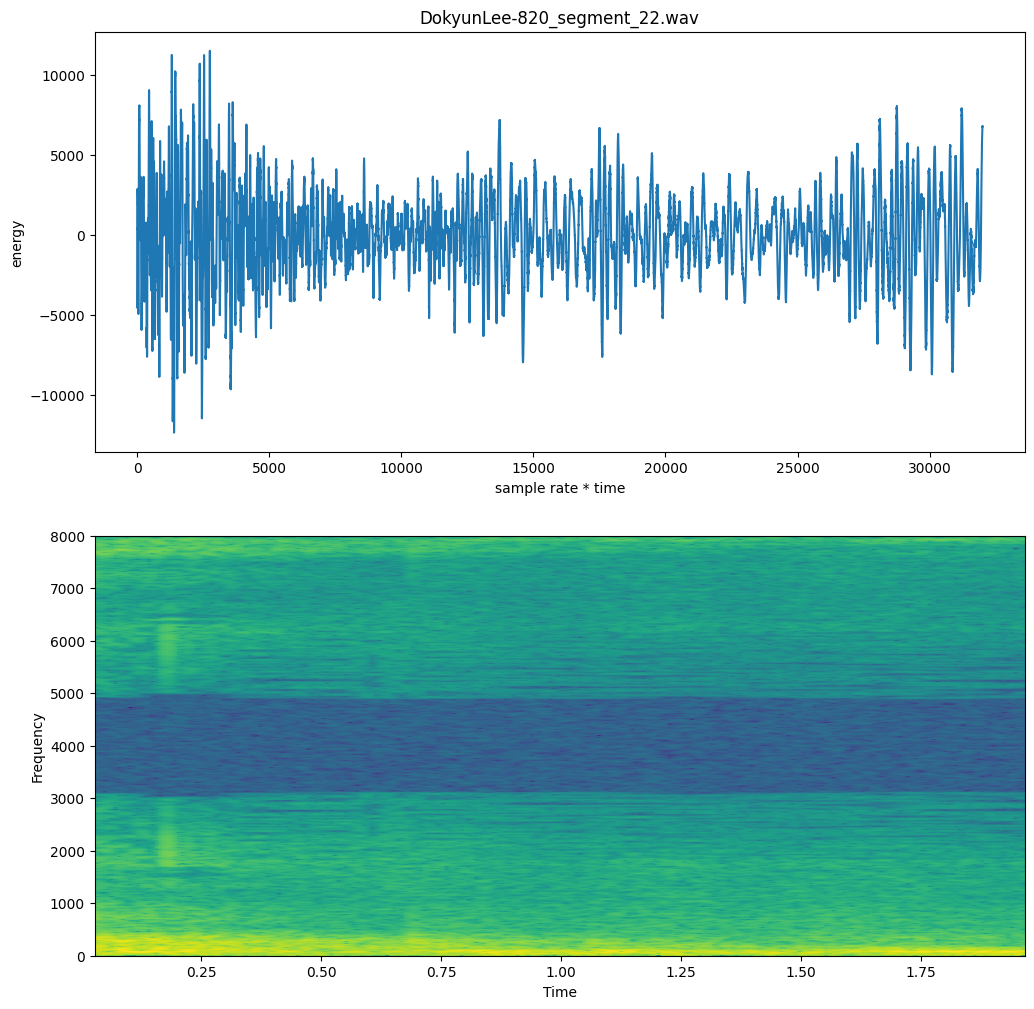

In [ ]:
import numpy as np
import wave
import matplotlib.pyplot as plt
for i in range(1,120,60): 
    signal_wave = wave.open(os.path.join(INPUT_DIR, parent_list[i]), 'r')
    sample_rate = 16000
    sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)

    plt.figure(figsize=(12,12))
    plot_a = plt.subplot(211)
    plot_a.set_title(parent_list[i])
    plot_a.plot(sig)
    plot_a.set_xlabel('sample rate * time')
    plot_a.set_ylabel('energy')

    plot_b = plt.subplot(212)
    plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
    plot_b.set_xlabel('Time')
    plot_b.set_ylabel('Frequency')

plt.show()

### 5.2 Convert all audio files into spectograms

In [ ]:
OUTPUT_DIR = '/content/drive/Shareddrives/BA865/'
import pylab
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.frombuffer(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

# For every recording, make a spectogram and save it as label_speaker_no.png
if not os.path.exists(os.path.join(OUTPUT_DIR, 'audio-images')):
    os.mkdir(os.path.join(OUTPUT_DIR, 'audio-images'))
    
for filename in os.listdir(INPUT_DIR):
    if "wav" in filename:
        file_path = os.path.join(INPUT_DIR, filename)
        file_stem = Path(file_path).stem
        target_dir = f'class_{file_stem[0:2]}'
        dist_dir = os.path.join(os.path.join(OUTPUT_DIR, 'audio-images'), target_dir)
        file_dist_path = os.path.join(dist_dir, file_stem)
        if not os.path.exists(file_dist_path + '.png'):
            if not os.path.exists(dist_dir):
                os.mkdir(dist_dir)
            file_stem = Path(file_path).stem
            sound_info, frame_rate = get_wav_info(file_path)
            pylab.specgram(sound_info, Fs=frame_rate)
            pylab.savefig(f'{file_dist_path}.png')
            pylab.close()



### 5.3 Train-Test Split and Image Pre-processing

In [ ]:
import tensorflow as tf
OUTPUT_DIR = '/content/drive/Shareddrives/BA865/'
# Declare constants
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
BATCH_SIZE = 32
N_CHANNELS = 3
N_CLASSES = 9

# Make a dataset containing the training spectrograms
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=os.path.join(OUTPUT_DIR, 'audio-images'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="training",
                                             seed=0)

# Make a dataset containing the validation spectrogram
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=os.path.join(OUTPUT_DIR, 'audio-images'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="validation",
                                             seed=0)

Found 1222 files belonging to 9 classes.
Using 978 files for training.
Found 1222 files belonging to 9 classes.
Using 244 files for validation.


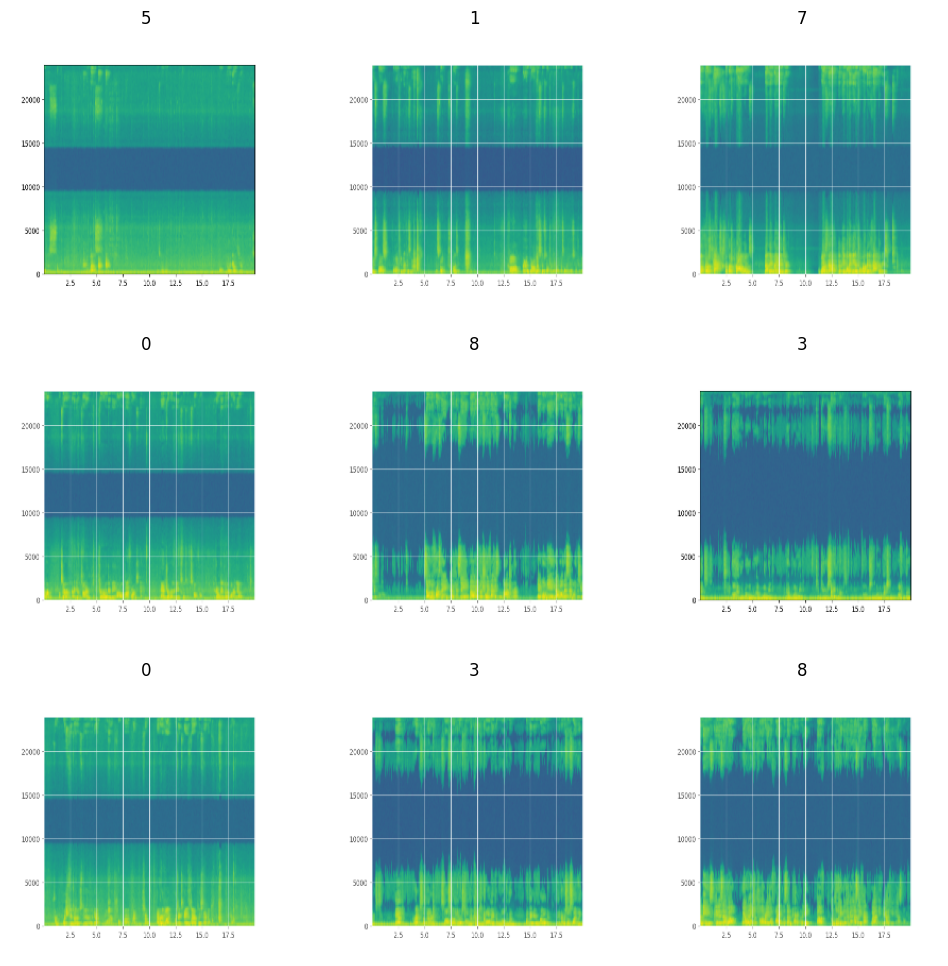

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.show()

### 5.4 Rescaling

In [ ]:
def prepare(ds, augment=False):
    # Define our one transformation
    rescale = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255)])
    flip_and_rotate = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
    ])
    
    # Apply rescale to both datasets and augmentation only to training
    ds = ds.map(lambda x, y: (rescale(x, training=True), y))
    if augment: ds = ds.map(lambda x, y: (flip_and_rotate(x, training=True), y))
    return ds

train_dataset = prepare(train_dataset, augment=False)
valid_dataset = prepare(valid_dataset, augment=False)

### 5.5 Create 2D Convolutional Neural Network

In [ ]:
model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))
model_2.add(tf.keras.layers.Conv2D(16, 3, strides=2, padding='same', activation='relu'))
model_2.add(tf.keras.layers.BatchNormalization())
model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_2.add(tf.keras.layers.BatchNormalization())
model_2.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model_2.add(tf.keras.layers.BatchNormalization())
model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_2.add(tf.keras.layers.BatchNormalization())
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(64, activation='relu'))
model_2.add(tf.keras.layers.BatchNormalization())
model_2.add(tf.keras.layers.Dropout(0.7))
model_2.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

# Compile model
model_2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['sparse_categorical_accuracy'],
)

# Train model for 10 epochs, capture the history
history = model_2.fit(train_dataset, epochs=50, validation_data=valid_dataset)

Epoch 1/50
31/31 [==============================] - 304s 8s/step - loss: 1.7856 - sparse_categorical_accuracy: 0.4018 - val_loss: 3.1325 - val_sparse_categorical_accuracy: 0.2254
Epoch 2/50
31/31 [==============================] - 11s 300ms/step - loss: 0.8715 - sparse_categorical_accuracy: 0.7362 - val_loss: 3.7774 - val_sparse_categorical_accuracy: 0.1230
Epoch 3/50
31/31 [==============================] - 10s 283ms/step - loss: 0.6341 - sparse_categorical_accuracy: 0.8415 - val_loss: 4.0956 - val_sparse_categorical_accuracy: 0.1189
Epoch 4/50
31/31 [==============================] - 12s 342ms/step - loss: 0.5832 - sparse_categorical_accuracy: 0.8620 - val_loss: 4.1048 - val_sparse_categorical_accuracy: 0.1189
Epoch 5/50
31/31 [==============================] - 10s 259ms/step - loss: 0.5168 - sparse_categorical_accuracy: 0.8957 - val_loss: 3.9058 - val_sparse_categorical_accuracy: 0.1189
Epoch 6/50
31/31 [==============================] - 9s 231ms/step - loss: 0.4659 - sparse_categor

In [ ]:
model_2.evaluate(valid_dataset)

8/8 [==============================] - 2s 18ms/step - loss: 0.0662 - sparse_categorical_accuracy: 0.9795


[0.06624320894479752, 0.9795082211494446]

### 5.6 Model Performance

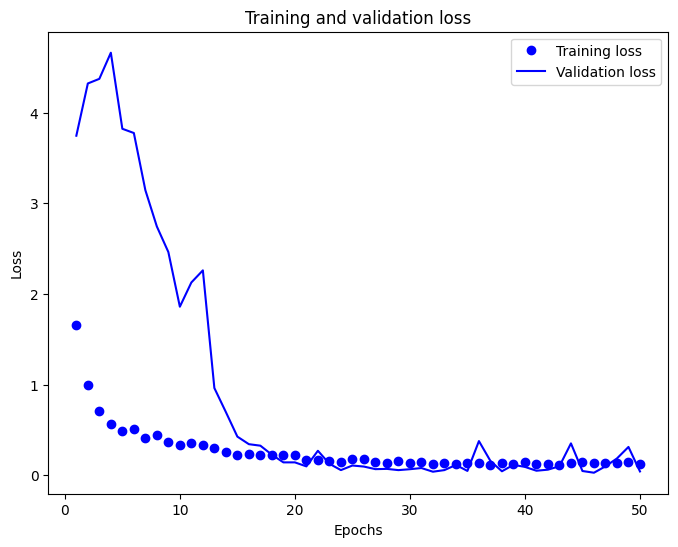

In [ ]:
# Plot the loss curves for training and validation.
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

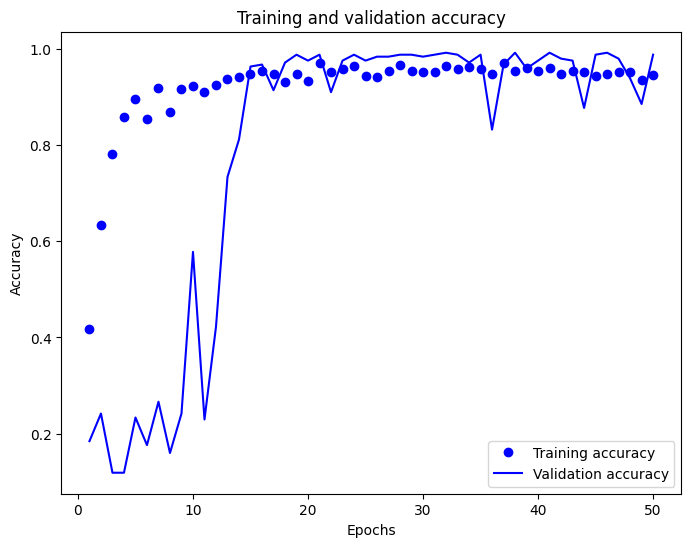

In [ ]:
acc_values = history_dict['sparse_categorical_accuracy']
val_acc_values = history_dict['val_sparse_categorical_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From this model, we can see that the model learns relatively fast, the training accuracy increases slows as number of epochs increases. It shows slightly overfitting,thus we can try to reduce the complexity of the model.

## **VI. LSTM Model**

### 6.1 Creating a LSTM Model

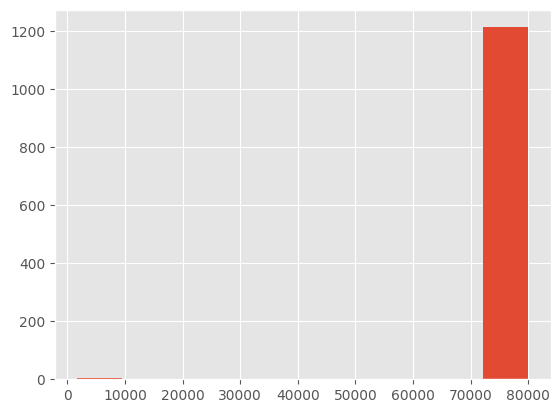

The longest list is 80000 long.
(1222, 4000, 2)


In [ ]:
import tensorflow as tf
import numpy as np
import statistics
import matplotlib.pyplot as plt
from keras.utils import pad_sequences
from sklearn.preprocessing import MinMaxScaler

len_lists = [len(x) for x in sequences]
plt.hist(len_lists)
plt.show()
print(f'The longest list is {max(len_lists)} long.')

# We can pad the sequences to have a common length (and chop off the end of really long ones)
labels = np.stack(labels)

# Be careful with this pad sequences function! By default it pads at the front...
# If you pad the wrong end and then truncate that can have a huge impact on model accuracy (e.g., 10%)
padded_sequences_LSTM = pad_sequences(sequences, maxlen=4000,padding="post")  

# We might use a min-max scaler here to whiten our data. Note that audio data is already generally centered around 0 though! So, it's not that important. 
#scaler = MinMaxScaler(feature_range=(-1, 1))
#scaler = scaler.fit(padded_sequences)
#padded_sequences = scaler.transform(padded_sequences)

# Shuffling observations, because certain voices come earlier in the file system, and others later.
shuffled_indices= np.arange(padded_sequences_LSTM.shape[0])
np.random.shuffle(shuffled_indices)
padded_sequences_LSTM = padded_sequences_LSTM[shuffled_indices,:]
labels = labels[shuffled_indices]

print(padded_sequences_LSTM.shape)

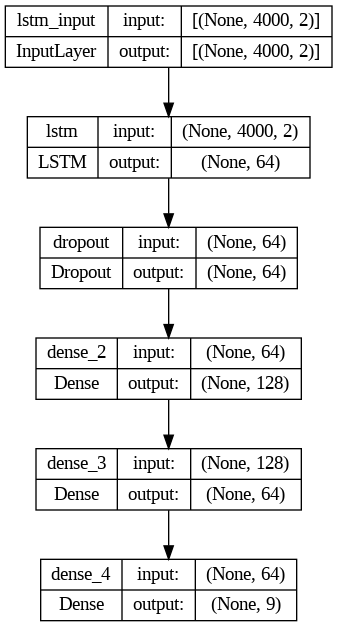

In [ ]:
model_LSTM = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(4000, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])
model_LSTM.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])
keras.utils.plot_model(model_LSTM,show_shapes=True)

In [ ]:
history_LSTM = model_LSTM.fit(padded_sequences,new_label,validation_split=0.2,batch_size=32,epochs=100)

Epoch 1/100
31/31 [==============================] - 8s 127ms/step - loss: 2.2032 - sparse_categorical_accuracy: 0.1341 - val_loss: 2.1916 - val_sparse_categorical_accuracy: 0.1551
Epoch 2/100
31/31 [==============================] - 3s 113ms/step - loss: 2.1853 - sparse_categorical_accuracy: 0.1597 - val_loss: 2.1915 - val_sparse_categorical_accuracy: 0.1429
Epoch 3/100
31/31 [==============================] - 4s 134ms/step - loss: 2.1778 - sparse_categorical_accuracy: 0.1668 - val_loss: 2.1921 - val_sparse_categorical_accuracy: 0.1510
Epoch 4/100
31/31 [==============================] - 3s 108ms/step - loss: 2.1682 - sparse_categorical_accuracy: 0.1556 - val_loss: 2.1735 - val_sparse_categorical_accuracy: 0.1429
Epoch 5/100
31/31 [==============================] - 3s 110ms/step - loss: 2.1452 - sparse_categorical_accuracy: 0.1791 - val_loss: 2.1583 - val_sparse_categorical_accuracy: 0.1673
Epoch 6/100
31/31 [==============================] - 4s 117ms/step - loss: 2.1444 - sparse_cate

### 6.2 Model Performance

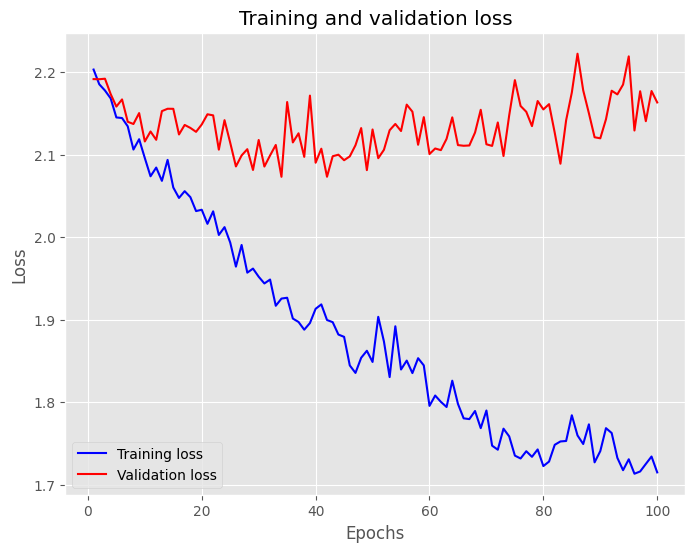

In [ ]:
# Plot the loss curves for training and validation.
history_dict = history_LSTM.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

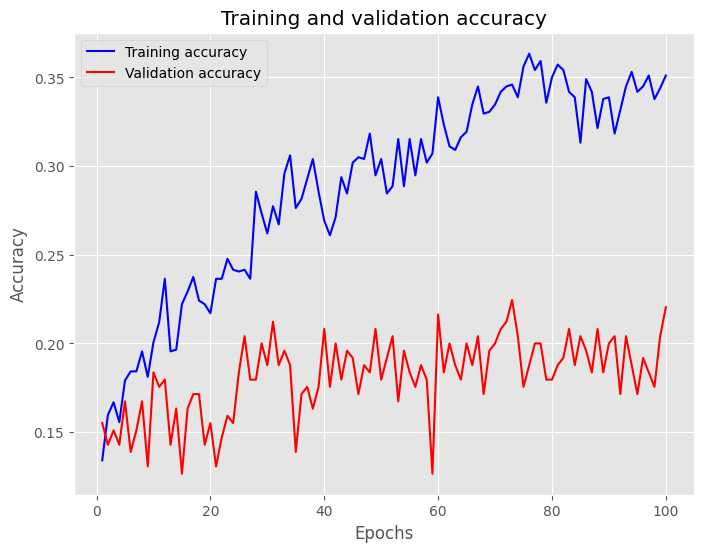

In [ ]:
acc_values = history_dict['sparse_categorical_accuracy']
val_acc_values = history_dict['val_sparse_categorical_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'b', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_true = new_label
y_pred = model_LSTM.predict(padded_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_true, y_pred_classes))

39/39 [==============================] - 2s 52ms/step
              precision    recall  f1-score   support

           0       0.24      0.35      0.28       127
           1       0.19      0.48      0.27       134
           2       0.28      0.31      0.30       118
           3       0.50      0.44      0.47       128
           4       0.44      0.40      0.42       129
           5       0.67      0.38      0.48       140
           6       0.57      0.18      0.27       129
           7       0.72      0.29      0.41       159
           8       0.53      0.51      0.52       158

    accuracy                           0.37      1222
   macro avg       0.46      0.37      0.38      1222
weighted avg       0.47      0.37      0.39      1222



The LSTM is not performing well in this dataset.The average validation accuracy is approximately 20%.

## **VII. Fine-Tuning and Final Model Selection**

### 7.1 Fine-tuning on CNN model

From our above model comparison, CNN has a much better performance compared to RNN models. Hence we will be fine-tuning on CNN models.
We are only able to perform Grid Search on the padded sequence with 4000 because the original sequence is too long.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Define the model architecture
def create_model(filters=32, kernel_size=3, activation='relu', dropout_rate=0.2):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation=activation, input_shape=(4000, 2)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(32, 1, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Conv1D(64, 1, activation='relu'))
    model.add(tf.keras.layers.GlobalAveragePooling1D())
    model.add(Flatten())
    model.add(Dense(units=64, activation=activation))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=9, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Load the data
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, new_label, test_size=0.2, random_state=42)

# Create a KerasClassifier for the model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=64, verbose=0)

# Define the hyperparameter search space
param_grid = {
    
    'kernel_size': [3, 5, 7],
    'dropout_rate': [0.2, 0.3, 0.4]
}

# Perform grid search for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring = "accuracy",
    n_jobs=-1
)

# Fit the grid search model on the training set
grid_search.fit(X_train, y_train)

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_
validation_score = best_model.score(X_val, y_val)

# Print the evaluation metric on the validation set
print("Validation score: {:.4f}".format(validation_score))

print("Best params: ", grid_search.best_params_)

<ipython-input-25-9e6b4c2929ab>:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=64, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Validation score: 0.4122
Best params:  {'dropout_rate': 0.2, 'kernel_size': 5}


In [ ]:
model_f = tf.keras.Sequential()
model_f.add(tf.keras.layers.Conv1D(16, 5, activation='relu', input_shape=(4000,2)))
model_f.add(tf.keras.layers.MaxPooling1D(2))
model_f.add(tf.keras.layers.Conv1D(32, 5, activation='relu'))
model_f.add(tf.keras.layers.MaxPooling1D(2))
model_f.add(tf.keras.layers.Conv1D(64, 5, activation='relu'))
model_f.add(tf.keras.layers.GlobalAveragePooling1D())
model_f.add(tf.keras.layers.Flatten())
model_f.add(tf.keras.layers.Dense(128, activation='relu'))
model_f.add(Dropout(0.6))
model_f.add(tf.keras.layers.Dense(9, activation='softmax'))
  
model_f.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])
keras.utils.plot_model(model,show_shapes=True)
history = model_f.fit(padded_sequences,new_label,validation_split=0.2,batch_size=64,epochs=250)

Epoch 1/250
16/16 [==============================] - 3s 44ms/step - loss: 98.7997 - sparse_categorical_accuracy: 0.1208 - val_loss: 9.0421 - val_sparse_categorical_accuracy: 0.2041
Epoch 2/250
16/16 [==============================] - 0s 17ms/step - loss: 11.2522 - sparse_categorical_accuracy: 0.1484 - val_loss: 2.8498 - val_sparse_categorical_accuracy: 0.2531
Epoch 3/250
16/16 [==============================] - 0s 16ms/step - loss: 3.8443 - sparse_categorical_accuracy: 0.1965 - val_loss: 2.0084 - val_sparse_categorical_accuracy: 0.2490
Epoch 4/250
16/16 [==============================] - 0s 14ms/step - loss: 2.5245 - sparse_categorical_accuracy: 0.1750 - val_loss: 1.9368 - val_sparse_categorical_accuracy: 0.2408
Epoch 5/250
16/16 [==============================] - 0s 15ms/step - loss: 2.1051 - sparse_categorical_accuracy: 0.2016 - val_loss: 1.8911 - val_sparse_categorical_accuracy: 0.2980
Epoch 6/250
16/16 [==============================] - 0s 17ms/step - loss: 2.0073 - sparse_categori

### **7.2 Pre-trained VGG16 Model for fine-tuning**

In [ ]:
import keras
from keras import layers
from keras.optimizers import RMSprop
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False # The convolutional layers won't be updatable; we just build on them using Functional API.

  
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS))

x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(9, activation="softmax")(x)
model_v = keras.Model(inputs, outputs)
model_v.compile(loss="sparse_categorical_crossentropy",
              optimizer= RMSprop(lr = 0.001),
              metrics=["sparse_categorical_accuracy"])

model_v.summary()

hostory_v = model_v.fit(train_dataset, epochs=30, validation_data=valid_dataset)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 tf.__operators__.getitem_4   (None, 256, 256, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_4 (TFOpLambd  (None, 256, 256, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               8388

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


31/31 [==============================] - 14s 393ms/step - loss: 37.1734 - sparse_categorical_accuracy: 0.1043 - val_loss: 18.9125 - val_sparse_categorical_accuracy: 0.1721
Epoch 2/30
31/31 [==============================] - 15s 356ms/step - loss: 24.4086 - sparse_categorical_accuracy: 0.1125 - val_loss: 22.3989 - val_sparse_categorical_accuracy: 0.0861
Epoch 3/30
31/31 [==============================] - 12s 342ms/step - loss: 25.4154 - sparse_categorical_accuracy: 0.1196 - val_loss: 17.4076 - val_sparse_categorical_accuracy: 0.0861
Epoch 4/30
31/31 [==============================] - 14s 384ms/step - loss: 22.7451 - sparse_categorical_accuracy: 0.1125 - val_loss: 21.6360 - val_sparse_categorical_accuracy: 0.1189
Epoch 5/30
31/31 [==============================] - 13s 364ms/step - loss: 20.2265 - sparse_categorical_accuracy: 0.1401 - val_loss: 23.4959 - val_sparse_categorical_accuracy: 0.0738
Epoch 6/30
31/31 [==============================] - 16s 470ms/step - loss: 18.9959 - sparse_cate

Pre-trained VGG is not performing well in this dataset.We should stick to our original 2D CNN model.

## **VII.Conclusion**

### 8.1 Comments on Model Performance

In summary, the 1D CNN may not be as effective at capturing global dependencies initially, but it is efficient and the accuracy improves with fine-tuning. Ultimately, the model achieved a final validation accuracy of 96%. The 2D CNN is excellent at capturing both local and global dependencies, leading to a high accuracy of 97%. However, it can be computationally expensive, requiring additional memory to store the images, and the training process can be time-consuming. Finally, the LSTM model is easy to use, but its accuracy may be limited due to the length of the sequences.

### 8.2 Limitation and Improvements

There are several areas for improvement in this project. 

1. Data collection can be improved since access to all original data on Echo360 is not available, and audio files are manually extracted from MSBA courses, making the process inefficient. This has led to a limited dataset, including only one sample of a female professor.

2. More preprocessing is needed to address the interference terms in the audio, including noise, reverberation, and classroom discussion, as our current preprocessing method cannot eliminate all of these.

3. Training the 2D CNN model caused the GPU to run out of RAM quickly, making it impossible to fine-tune the model or increase the number of epochs for better accuracy.

4. Other network structures and evaluation metrics can be explored. For example, CRNNs and GANs may improve the accurancy. Precision, recall, and robustness can provide a more comprehensive evaluation of the model's performance.